In [20]:
import pandas as pd
import numpy as np
from datetime import  datetime
import matplotlib.pyplot as plt
from matplotlib.pyplot import ylabel
from plotly.matplotlylib.mplexporter.renderers import fig_to_vega

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False


# 零售会员数据分析

In [2]:
customer_info = pd.read_excel('data/会员信息查询.xlsx')
customer_info.head()

,会员卡号,会员等级,会员来源,注册时间,所属店铺编码,门店店员编码,省份,城市,性别,生日,年齡,生命级别
0,BL6099033963550303769,黄金会员,线下扫码,2019-03-31 23:55:03.977,DPXX07,NaN,NaN,NaN,女,1975-04-04,43.0,活跃
1,BL6099033963450303763,黄金会员,线下扫码,2019-03-31 23:45:03.005,DPXX07,NaN,NaN,NaN,女,1982-04-02,36.0,活跃
2,BL6099033963464003767,白银会员,电商入口,2019-03-31 23:42:40.073,DPS00X,NaN,NaN,NaN,女,1988-08-13,30.0,沉睡
3,BL6099033963460503766,黄金会员,线下扫码,2019-03-31 23:42:05.516,DPXX07,NaN,NaN,NaN,女,1993-11-24,25.0,活跃
4,BL6099033963660603765,白银会员,电商入口,2019-03-31 23:26:02.402,DPS00X,NaN,NaN,NaN,女,1993-03-20,26.0,沉睡


## 1. 按月统计注册的会员数量(即:月增量)

In [10]:
# 1. 给上述 df 独享,新增 1 列,充当: 年月字段
customer_info['注册年月'] = customer_info['注册时间'].apply(lambda x: x.strftime("%Y-%m"))
# customer_info.head()

# 2. 从上述的 df 对象中,获取到我们要用的字段
customer_info[['会员卡号','会员等级','会员来源','注册时间','注册年月']]

,会员卡号,会员等级,会员来源,注册时间,注册年月
0,BL6099033963550303769,黄金会员,线下扫码,2019-03-31 23:55:03.977,2019-03
1,BL6099033963450303763,黄金会员,线下扫码,2019-03-31 23:45:03.005,2019-03
2,BL6099033963464003767,白银会员,电商入口,2019-03-31 23:42:40.073,2019-03
3,BL6099033963460503766,黄金会员,线下扫码,2019-03-31 23:42:05.516,2019-03
4,BL6099033963660603765,白银会员,电商入口,2019-03-31 23:26:02.402,2019-03
...,...,...,...,...,...
952709,HS346696JA9D,钻石会员,线下扫码,2017-08-03 00:00:00.000,2017-08
952710,HS367073JA96,钻石会员,线下扫码,2017-08-03 00:00:00.000,2017-08
952711,HS353666JAD9,钻石会员,线下扫码,2017-08-03 00:00:00.000,2017-08
952712,SB035933JA46,钻石会员,线下扫码,2017-08-03 00:00:00.000,2017-08


In [18]:
# 3. 完成上述的需求，按月统计注册的会员数量
month_count = customer_info.groupby('注册年月')[['会员卡号']].count()
month_count.columns = ['月增量']
month_count[1:]

,月增量
注册年月,
2017-09,760
2017-10,996
2017-11,1710
2017-12,4165
2018-01,15531
2018-02,13798
2018-03,49320
2018-04,71699
2018-05,27009


<Axes: xlabel='年月', ylabel='月增量'>

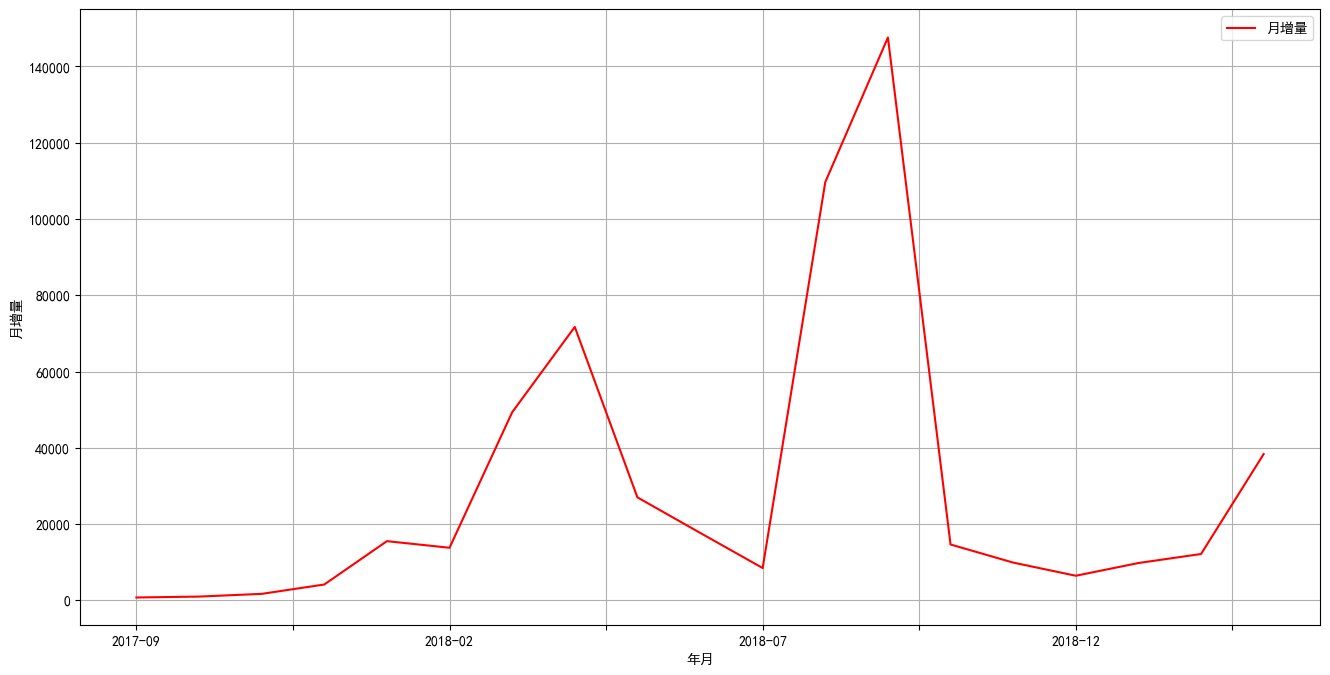

In [34]:
# 4. 针对上述的数据进行可视化操作
new_month_count = month_count[1:]
# color 颜色 legend 设置图例  grid 设置网络线  xlabel x轴显示内容  ylabei y轴显示内容
new_month_count['月增量'].plot(figsize=(16,8),color="red",legend=True,grid=True,ylabel="月增量",xlabel="年月")

<Axes: xlabel='注册年月'>

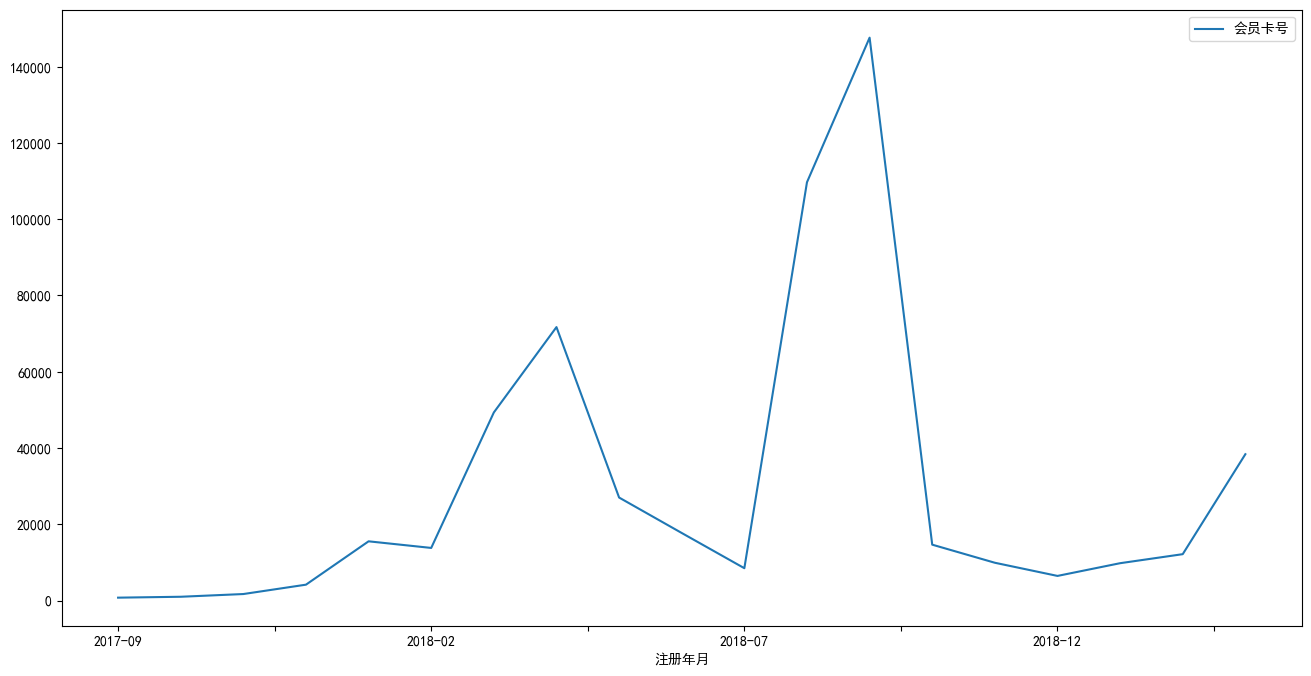

In [40]:
# 5. pivot_table() 透视表,也可以是实现 groupby() 函数功能,且透视表比 groupby() 更加灵活
customer_info.pivot_table(index='注册年月',values="会员卡号",aggfunc='count')[1:].plot(figsize=(16,8))

In [46]:
# 2. 按月计算每月 会员月存量, 月存量 = 当月月增量 + 之前所有月的存量, 即: 从第1个月至当前月的月增量的累加和
month_count.loc[:,'会员存量'] = month_count['月增量'].cumsum()
month_count.head()

,月增量,会员存量
注册年月,,
2017-08,392910,392910
2017-09,760,393670
2017-10,996,394666
2017-11,1710,396376
2017-12,4165,400541


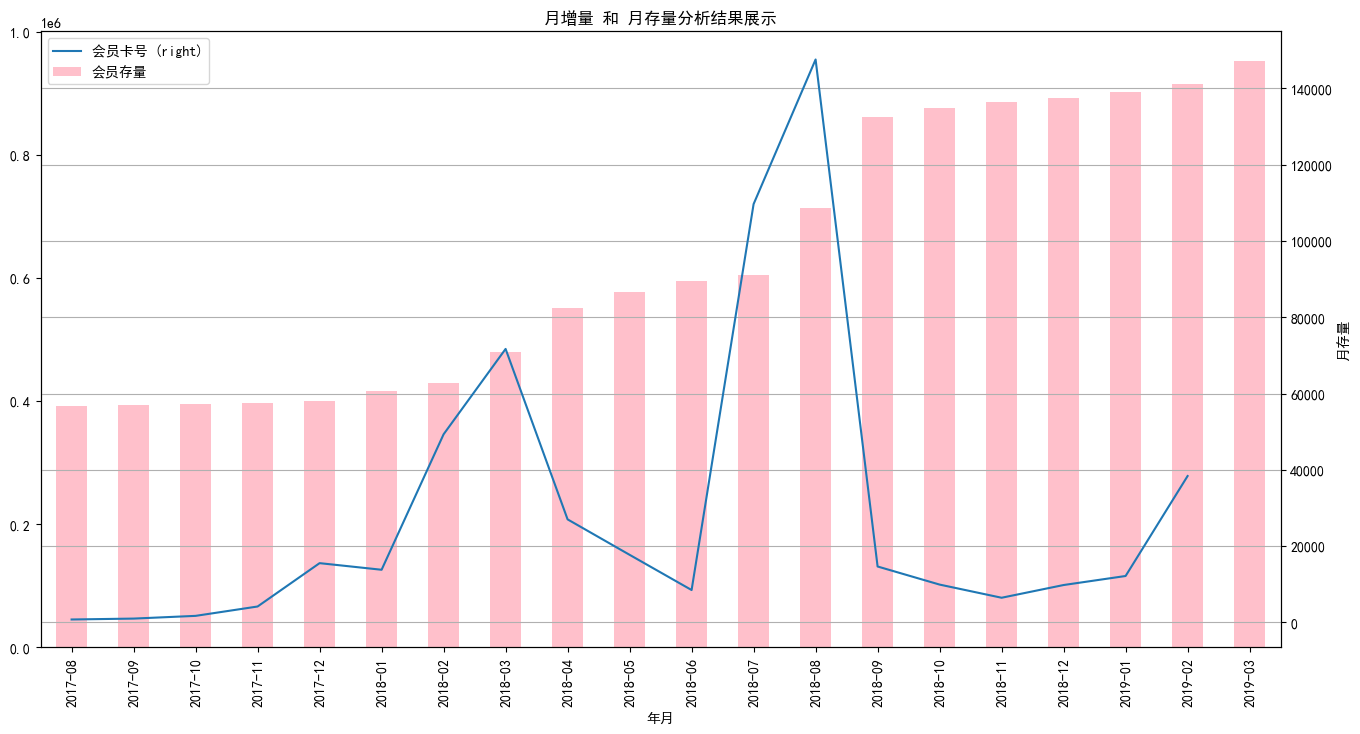

In [67]:
# 可视化
customer_info.pivot_table(index='注册年月',values="会员卡号",aggfunc='count')[1:].plot(figsize=(16,8),secondary_y=True,legend=True,grid=True)
month_count['会员存量'].plot(kind="bar",figsize=(16,8),color='pink',grid=True,legend=True,xlabel="年月",ylabel="月存量")
plt.title("月增量 和 月存量分析结果展示")
plt.show() # 这行代码可以省略不写

## 3. 会员增量等级分布

In [68]:
# 1. 查看目前的源数据
customer_info.head()

,会员卡号,会员等级,会员来源,注册时间,所属店铺编码,门店店员编码,省份,城市,性别,生日,年齡,生命级别,注册年月
0,BL6099033963550303769,黄金会员,线下扫码,2019-03-31 23:55:03.977,DPXX07,NaN,NaN,NaN,女,1975-04-04,43.0,活跃,2019-03
1,BL6099033963450303763,黄金会员,线下扫码,2019-03-31 23:45:03.005,DPXX07,NaN,NaN,NaN,女,1982-04-02,36.0,活跃,2019-03
2,BL6099033963464003767,白银会员,电商入口,2019-03-31 23:42:40.073,DPS00X,NaN,NaN,NaN,女,1988-08-13,30.0,沉睡,2019-03
3,BL6099033963460503766,黄金会员,线下扫码,2019-03-31 23:42:05.516,DPXX07,NaN,NaN,NaN,女,1993-11-24,25.0,活跃,2019-03
4,BL6099033963660603765,白银会员,电商入口,2019-03-31 23:26:02.402,DPS00X,NaN,NaN,NaN,女,1993-03-20,26.0,沉睡,2019-03


In [73]:
# 2. 使用透视表,计算: 按月 会员增量等级分布即可
membar_rating = customer_info.pivot_table(index="注册年月",columns="会员等级",values="会员卡号",aggfunc='count')
membar_rating = membar_rating[1:]
membar_rating

会员等级,白银会员,钻石会员,铂金会员,黄金会员
注册年月,,,,
2017-09,530,3,10,217
2017-10,603,13,17,363
2017-11,1311,19,20,360
2017-12,3512,15,24,614
2018-01,11244,24,64,4199
2018-02,9937,9,34,3818
2018-03,41546,57,94,7623
2018-04,62613,48,83,8955
2018-05,19317,19,56,7617


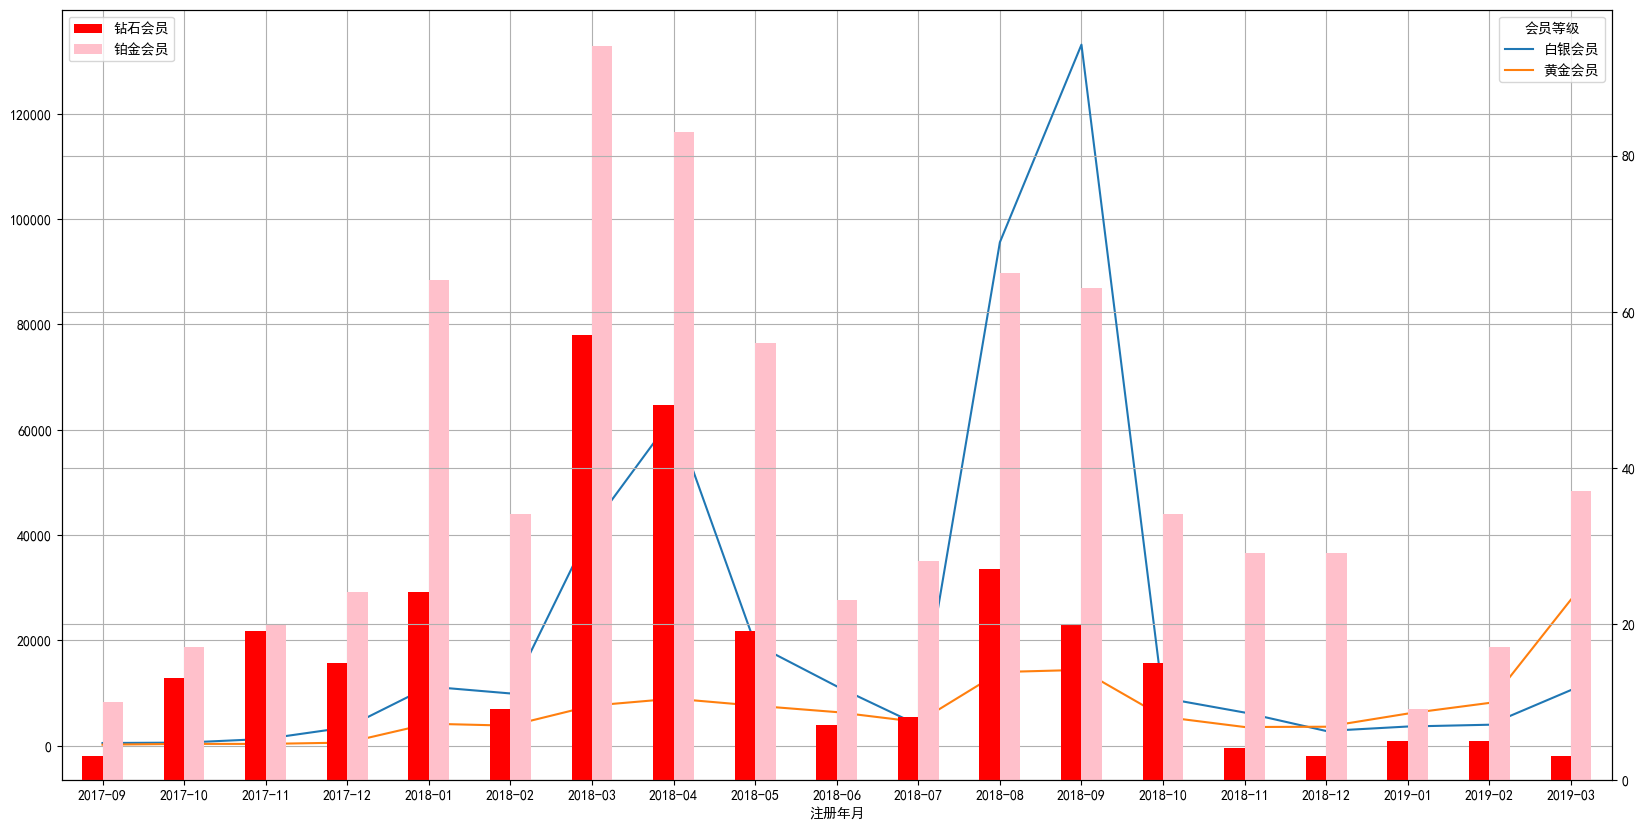

In [86]:
# 4. 月增量 会员等级分布结果查看
# 4.1 构建画布,坐标系
fig,ax1 = plt.subplots(figsize=(20,10))
# 4.2 基于 ax1 复制一个新的坐标系,ax2  ax1 展示 白银黄金 ax2 表示 钻石和铂金
ax2 = ax1.twinx()
membar_rating[['白银会员','黄金会员']].plot(ax=ax1,legend=True,grid=True)
# 4.3 ax2 : 展示 钻石 铂金会员
membar_rating[['钻石会员','铂金会员']].plot(kind='bar',ax=ax2,legend=True,grid=True,color=['red','pink'])
# 4.5 设置 ax2 坐标系的图例到:左侧
ax2.legend(loc='upper left')